<a href="https://colab.research.google.com/github/Leucocitokiller/Dataframes---Machine-Learning/blob/main/Proyecto_final_MLIII_Libenson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final NLP y Redes Neuronales.

# Introducci√≥n

## Se realizar√° un analisis de sentimientos usando una lista de comentarios respecto a comidas de distintos restaurantes.

# Fuente de datos.

## Importaci√≥n de librerias

In [1]:
import urllib.request
import numpy as np
import pandas as pd
import os
import time
import sys
#-----librerias para trabajar PLN
!python -m spacy download es_core_news_md
import spacy
import es_core_news_md
#es_core_news_md Medium (modelo mediano):
#Es m√°s pesado y m√°s lento que el sm, pero mucho m√°s preciso. Tiene vectores de palabras, entiende mejor el significado de las palabras.

#-----instalaci√≥n d librerias para an√°lisis de sentimientos.
!pip install spacy spacy-transformers
!pip install pysentimiento
from pysentimiento import create_analyzer

#----librerias para normalizaci√≥n de textos
import re
from unicodedata import normalize
import unicodedata
from collections import Counter


#----librerias para graficar y wordcloud.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#----librer√≠as para trabajar con TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
#----libreria para trabajar con BoW.
from sklearn.feature_extraction.text import CountVectorizer
#----librerias para Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 19.5 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.0/44.0 kB 2.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 756.2/756.2 kB 20.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 314.0/314.0 kB 24.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚

## Lectura de los datos desde Github

In [2]:
# Diccionario con las fuentes y sus URLs
filepath_dict = {
    'yelp': 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/main/yelp_comentarios.csv',
    'amazon': 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/main/amazon_cells_comentarios.csv'

}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['Comentario', 'Valor'], sep=';', encoding='latin-1')
    df['Origen'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
df.head(1100)

Comentario  Valor  Origen
0                       Wow ... Me encant√≥ este lugar.      1    yelp
1                              La corteza no es buena.      0    yelp
2    No sabroso y la textura era simplemente desagr...      0    yelp
3    Me detuve durante las vacaciones de fines de m...      1    yelp
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp
..                                                 ...    ...     ...
96          Si planeas usar esto en un auto, olv√≠dalo.      0  amazon
97            Encontr√© este producto demasiado grande.      0  amazon
98   Lo mejor que he encontrado hasta ahora ... He ...      1  amazon
99             Estoy muy decepcionado con mi decisi√≥n.      0  amazon
100  Integrado a la perfecci√≥n con el tel√©fono Moto...      1  amazon

[1100 rows x 3 columns]

# Normalizaci√≥n de la fuente de datos.

## En el proceso de Normalizaci√≥n de datos, se realizar√° lo siguiente:

### 1. Eliminaci√≥n de signos de puntuaci√≥n.
### 2. Reducir a min√∫sculas todo el texto.
### 3. Convertir a n√∫mero la columna Valor para su postprocesamiento.

## 1. Eliminaci√≥n de signos de puntuaci√≥n

In [3]:
# Definici√≥n de funci√≥n para eliminar los signos de puntuaci√≥n utilizando re, pero considerando no borrar las vocales con acento.

def remove_punctuation(text):
    # Normaliza el texto a NFKD para separar letras y sus tildes
    text = unicodedata.normalize('NFKD', text)
    # Elimina los caracteres diacr√≠ticos (como las tildes)
    text = ''.join(c for c in text if not unicodedata.combining(c))
    # Elimina todo lo que no sea letras, n√∫meros o espacios
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text


# Aplicar la funci√≥n a la columna 'review_lower'
df['Comentarios'] = df['Comentario'].apply(remove_punctuation)

In [4]:
df

Comentario  Valor  Origen  \
0                       Wow ... Me encant√≥ este lugar.      1    yelp   
1                              La corteza no es buena.      0    yelp   
2    No sabroso y la textura era simplemente desagr...      0    yelp   
3    Me detuve durante las vacaciones de fines de m...      1    yelp   
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp   
..                                                 ...    ...     ...   
995  La pantalla se mancha f√°cilmente porque toca l...      0  amazon   
996  Qu√© pedazo de chatarra ... Pierdo m√°s llamadas...      0  amazon   
997             El art√≠culo no coincide con la imagen.      0  amazon   
998  Lo √É¬∫nico que me decepcion√≥ es el puerto infra...      0  amazon   
999  No se puede contestar llamadas con la unidad, ...      0  amazon   

                                           Comentarios  
0                           Wow  Me encanto este lugar  
1                               La corteza no es buena  
2    No sabroso y la textura era simplemente desagr...  
3    Me detuve durante las vacaciones de fines de m...  
4    La seleccion en el menu era genial al igual qu...  
..                                                 ...  
995  La pantalla se mancha facilmente porque toca l...  
996  Que pedazo de chatarra  Pierdo mas llamadas en...  
997              El articulo no coincide con la imagen  
998  Lo Aonico que me decepciono es el puerto infra...  
999  No se puede contestar llamadas con la unidad n...  

[1999 rows x 4 columns]

### Se puede observar que la puntuaci√≥n se elimin√≥, y las palabras con acentos mantuvieron las vocales para mayor legibilidad.

## 2. Reducir a min√∫sculas todo el texto.

In [5]:
# Create a new column 'Comentarios_lower' with lowercase values from 'Comentario'
df['Comentarios_lower'] = df['Comentarios'].str.lower()

In [6]:
df

Comentario  Valor  Origen  \
0                       Wow ... Me encant√≥ este lugar.      1    yelp   
1                              La corteza no es buena.      0    yelp   
2    No sabroso y la textura era simplemente desagr...      0    yelp   
3    Me detuve durante las vacaciones de fines de m...      1    yelp   
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp   
..                                                 ...    ...     ...   
995  La pantalla se mancha f√°cilmente porque toca l...      0  amazon   
996  Qu√© pedazo de chatarra ... Pierdo m√°s llamadas...      0  amazon   
997             El art√≠culo no coincide con la imagen.      0  amazon   
998  Lo √É¬∫nico que me decepcion√≥ es el puerto infra...      0  amazon   
999  No se puede contestar llamadas con la unidad, ...      0  amazon   

                                           Comentarios  \
0                           Wow  Me encanto este lugar   
1                               La corteza no es buena   
2    No sabroso y la textura era simplemente desagr...   
3    Me detuve durante las vacaciones de fines de m...   
4    La seleccion en el menu era genial al igual qu...   
..                                                 ...   
995  La pantalla se mancha facilmente porque toca l...   
996  Que pedazo de chatarra  Pierdo mas llamadas en...   
997              El articulo no coincide con la imagen   
998  Lo Aonico que me decepciono es el puerto infra...   
999  No se puede contestar llamadas con la unidad n...   

                                     Comentarios_lower  
0                           wow  me encanto este lugar  
1                               la corteza no es buena  
2    no sabroso y la textura era simplemente desagr...  
3    me detuve durante las vacaciones de fines de m...  
4    la seleccion en el menu era genial al igual qu...  
..                                                 ...  
995  la pantalla se mancha facilmente porque toca l...  
996  que pedazo de chatarra  pierdo mas llamadas en...  
997              el articulo no coincide con la imagen  
998  lo aonico que me decepciono es el puerto infra...  
999  no se puede contestar llamadas con la unidad n...  

[1999 rows x 5 columns]

## 3.  Convertir a n√∫mero la columna Valor para su postprocesamiento.

In [7]:
# Convertimos la columna rating a valor num√©rico
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

In [8]:
df['Valor']

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Valor, Length: 1999, dtype: int64

# üß† Procesamiento NLP

## Generaci√≥n del objeto de SPacy para utilizar en el procesamiento del texto en espa√±ol.

In [9]:
nlp = es_core_news_md.load()

## Tokenizaci√≥n.

In [10]:
df['Comentarios_tokenizados'] = df['Comentarios_lower'].apply(lambda text: nlp(text))

In [11]:
df[['Comentarios_tokenizados','Comentarios_lower']].head()

Comentarios_tokenizados  \
0                 (wow,  , me, encanto, este, lugar)   
1                       (la, corteza, no, es, buena)   
2  (no, sabroso, y, la, textura, era, simplemente...   
3  (me, detuve, durante, las, vacaciones, de, fin...   
4  (la, seleccion, en, el, menu, era, genial, al,...   

                                   Comentarios_lower  
0                         wow  me encanto este lugar  
1                             la corteza no es buena  
2  no sabroso y la textura era simplemente desagr...  
3  me detuve durante las vacaciones de fines de m...  
4  la seleccion en el menu era genial al igual qu...

## Remoci√≥n de Stop Words

In [12]:
def parse_and_remove_stopwords(doc):
    """
    Remueve las stopwords de un objeto spaCy Doc.
    """
    # Filtrar stopwords y obtener los tokens como texto
    tokens_filtrados = [token.text for token in doc if not token.is_stop]
    return tokens_filtrados

# Aplicar la funci√≥n al DataFrame
df['Comentarios_sin_StopWords'] = df['Comentarios_tokenizados'].apply(parse_and_remove_stopwords)

In [13]:
df[['Comentarios_tokenizados','Comentarios_sin_StopWords']].head()

Comentarios_tokenizados  \
0                 (wow,  , me, encanto, este, lugar)   
1                       (la, corteza, no, es, buena)   
2  (no, sabroso, y, la, textura, era, simplemente...   
3  (me, detuve, durante, las, vacaciones, de, fin...   
4  (la, seleccion, en, el, menu, era, genial, al,...   

                           Comentarios_sin_StopWords  
0                           [wow,  , encanto, lugar]  
1                                          [corteza]  
2      [sabroso, textura, simplemente, desagradable]  
3  [detuve, vacaciones, fines, mayo, recomendacio...  
4                 [seleccion, menu, genial, precios]

## Lematizado

In [14]:
def lematizar_sin_stopwords(doc):
    """
    Devuelve una lista de lemas excluyendo las stopwords.

    Par√°metro:
    - doc: objeto spaCy Doc

    Retorna:
    - Lista de lemas (str) sin stopwords
    """
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Aplicar la funci√≥n y guardar el resultado en una nueva columna
df['Comentarios_lema'] = df['Comentarios_tokenizados'].apply(lematizar_sin_stopwords)

In [15]:
df[['Comentarios_tokenizados','Comentarios_lema']].head(100)

Comentarios_tokenizados  \
0                  (wow,  , me, encanto, este, lugar)   
1                        (la, corteza, no, es, buena)   
2   (no, sabroso, y, la, textura, era, simplemente...   
3   (me, detuve, durante, las, vacaciones, de, fin...   
4   (la, seleccion, en, el, menu, era, genial, al,...   
..                                                ...   
95                         (nunca, volveremos, a, ir)   
96                            (volveremos, de, nuevo)   
97                       (ala, comida, llego, rapido)   
98                                   (no, era, bueno)   
99  (en, el, lado, positivo, su, cafeteria, sirve,...   

                                     Comentarios_lema  
0                              [wow, encantar, lugar]  
1                                           [corteza]  
2       [sabroso, textura, simplemente, desagradable]  
3   [detener, vacaci√≥n, fines, mayo, recomendaci√≥n...  
4                   [seleccion, menu, genial, precio]  
..                                                ...  
95                                           [volver]  
96                                           [volver]  
97                      [ala, comida, llegar, rapido]  
98                                                 []  
99              [positivo, cafeteria, servir, comida]  

[100 rows x 2 columns]

## WordCloud (Nube de Palabras)


### WordCloud de Yelp

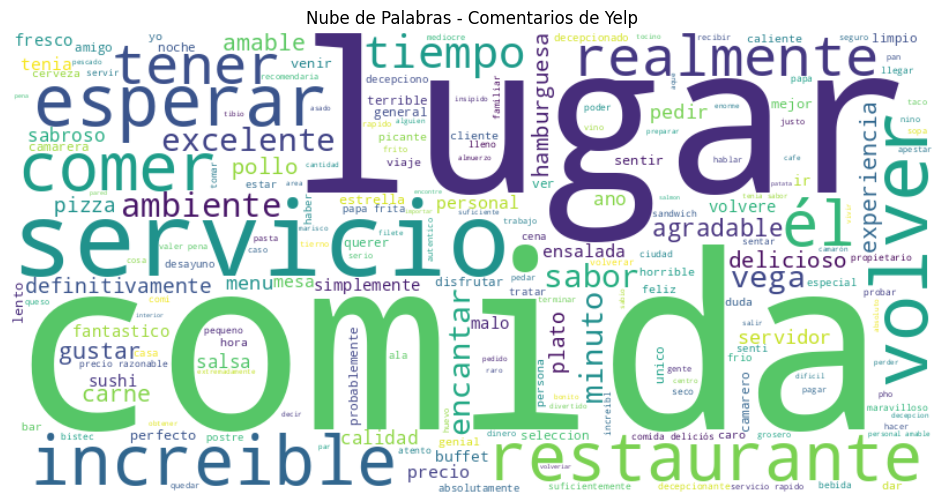

In [16]:
# Filtrar el DataFrame
df_yelp = df[df['Origen'] == 'yelp']

# Unir todos los lemas en un solo string (comentarios lematizados ya est√°n en listas)
texto_yelp = ' '.join([' '.join(lemas) for lemas in df_yelp['Comentarios_lema']])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_yelp)

# Mostrar la nube
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Comentarios de Yelp")
plt.show()


### Word cloud de Amazon

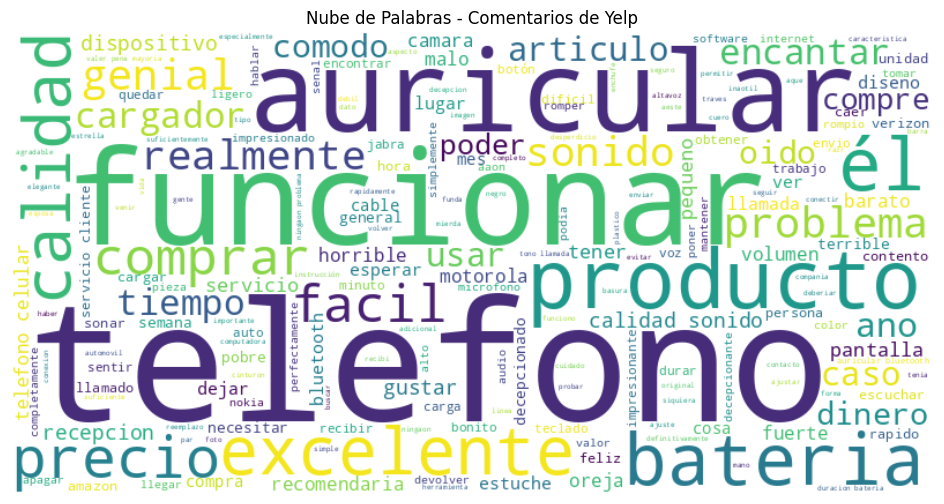

In [17]:
# Filtrar el DataFrame
df_amazon = df[df['Origen'] == 'amazon']

# Unir todos los lemas en un solo string (comentarios lematizados ya est√°n en listas)
texto_amazon = ' '.join([' '.join(lemas) for lemas in df_amazon['Comentarios_lema']])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_amazon)

# Mostrar la nube
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Comentarios de Yelp")
plt.show()


## Conteo de Palabras mas comunes

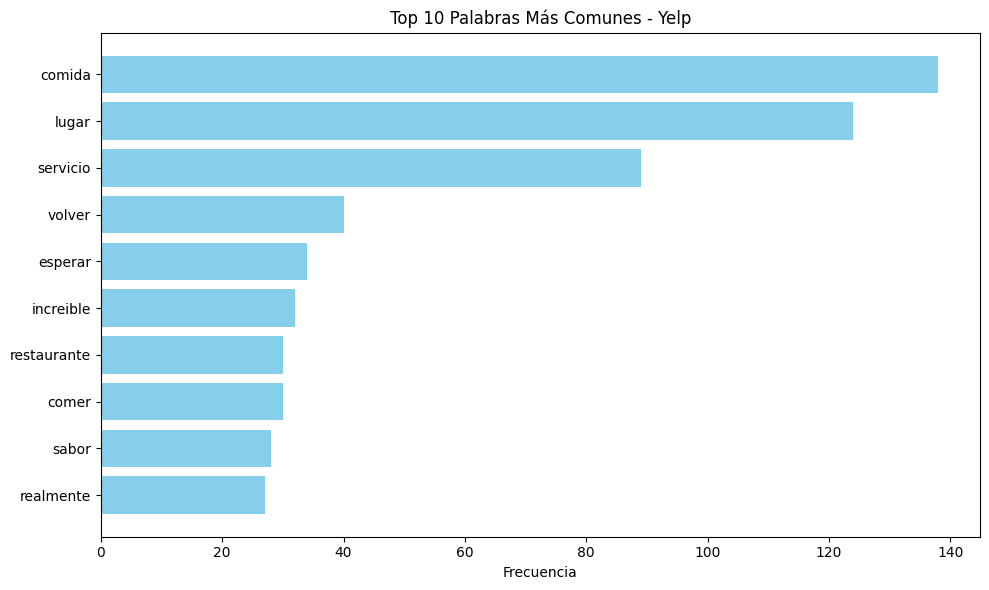

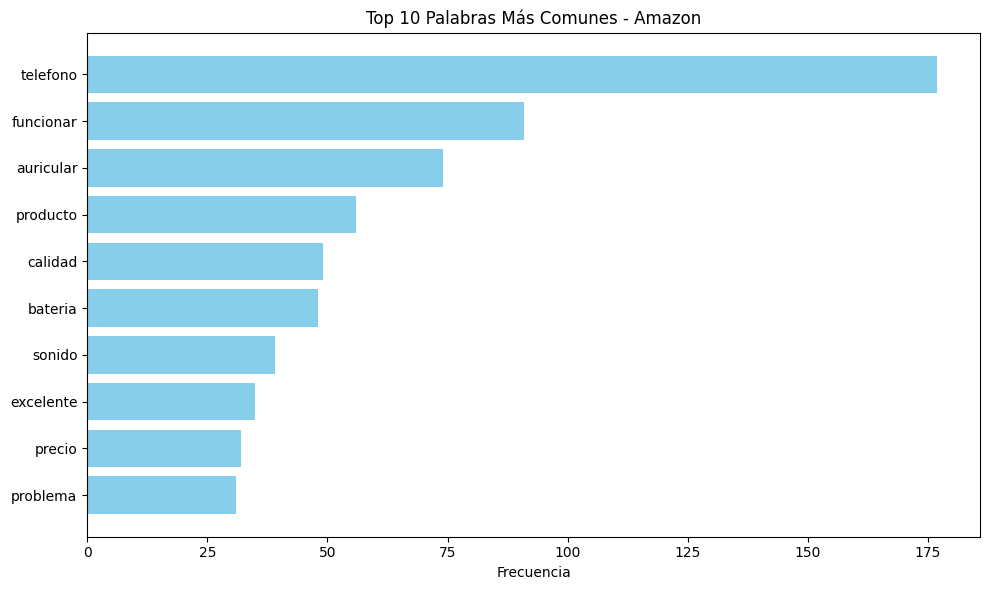

In [18]:
def graficar_palabras_comunes(df, origen, top_n=10):
    # Filtrar y aplanar los lemas
    lemas = [lema for lemas in df[df['Origen'] == origen]['Comentarios_lema'] for lema in lemas]
    conteo = Counter(lemas).most_common(top_n)

    # Separar palabras y frecuencias
    palabras, frecuencias = zip(*conteo)

    # Crear gr√°fico
    plt.figure(figsize=(10, 6))
    plt.barh(palabras, frecuencias, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(f'Top {top_n} Palabras M√°s Comunes - {origen.capitalize()}')
    plt.gca().invert_yaxis()  # Poner la palabra m√°s com√∫n arriba
    plt.tight_layout()
    plt.show()

# Graficar para Yelp
graficar_palabras_comunes(df, 'yelp')

# Graficar para Amazon
graficar_palabras_comunes(df, 'amazon')


## Bigramas + WordCloud

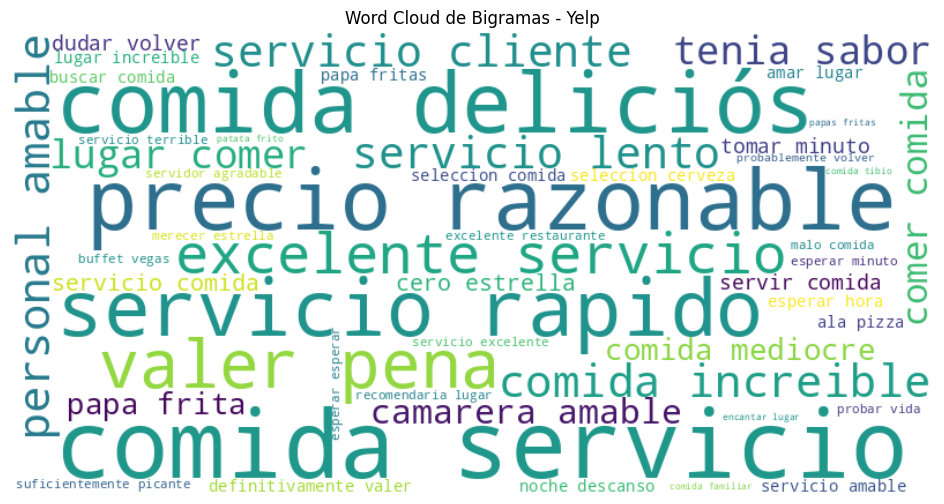

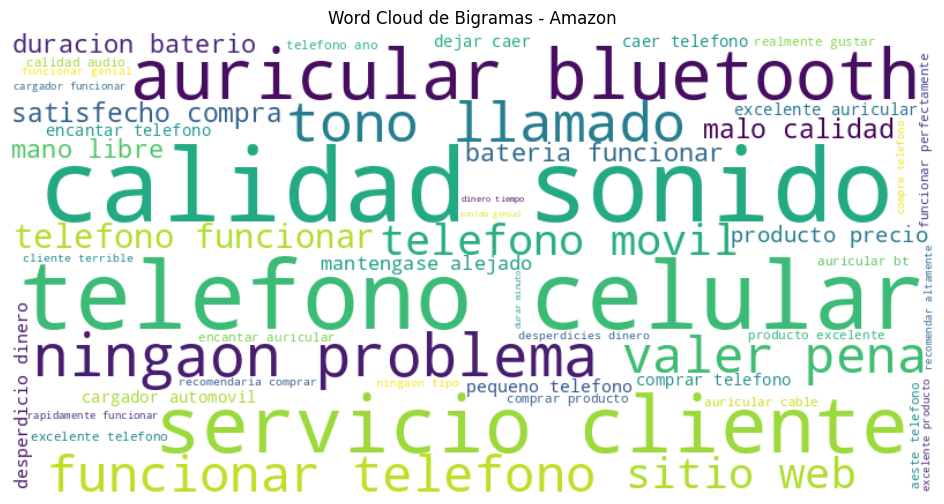

In [19]:
def generar_bigramas_spacy(df, origen, top_n=50):
    """
    Genera bigramas usando spaCy a partir de la columna 'Comentarios_Lema', sin stopwords.
    Luego genera una nube de palabras.
    """
    # Filtrar los comentarios por 'origen' (por ejemplo, 'yelp' o 'amazon')
    comentarios = df[df['Origen'] == origen]['Comentarios_lema']

    # Generar bigramas
    bigramas = []
    for comentario in comentarios:
        # Crear un Doc de spaCy a partir de la lista de lemas (de la columna 'Comentarios_Lema')
        doc = nlp(' '.join(comentario))  # Unimos la lista de lemas y lo procesamos con spaCy
        # Extraer bigramas
        for i in range(len(doc) - 1):
            if not doc[i].is_stop and not doc[i+1].is_stop:  # Asegurarse de que no sean stopwords
                bigramas.append((doc[i].lemma_, doc[i+1].lemma_))

    # Contar los bigramas m√°s comunes
    conteo_bigramas = Counter(bigramas).most_common(top_n)

    # Convertir los bigramas a formato texto "palabra1 palabra2"
    bigramas_texto = {' '.join(bigrama): freq for bigrama, freq in conteo_bigramas}

    # Generar la nube de palabras de los bigramas
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigramas_texto)

    # Mostrar la nube
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud de Bigramas - {origen.capitalize()}")
    plt.show()

# Generar la nube de bigramas para Yelp y Amazon
generar_bigramas_spacy(df, 'yelp')
generar_bigramas_spacy(df, 'amazon')


## üöÄ An√°lisis de sentimiento en espa√±ol con pysentimiento

###Procesamiento del sentimiento con los comentarios sin procesar.

In [20]:
from pysentimiento import create_analyzer

# Crear analizador de sentimientos
analyzer = create_analyzer(task="sentiment", lang="es")

# Aplicar a una columna de texto
df['Sentimiento'] = df['Comentarios'].apply(lambda x: analyzer.predict(x).output)
# Sentimiento solo guarda lo predicho (POS, NEU o NEG)

df['Probabilidad'] = df['Comentarios'].apply(lambda x: analyzer.predict(x).probas)
#Ese diccionario contiene la probabilidad de cada clase: positivo, neutro, negativo Ejemplo: {'POS': 0.84, 'NEU': 0.10, 'NEG': 0.06}.



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

### üìä  Gr√°fico de barras de frecuencia de sentimientos


### An√°lisis de sentimientos con todos los datos de yelp y Amazon juntos.

<ipython-input-21-a75de3f36333>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')


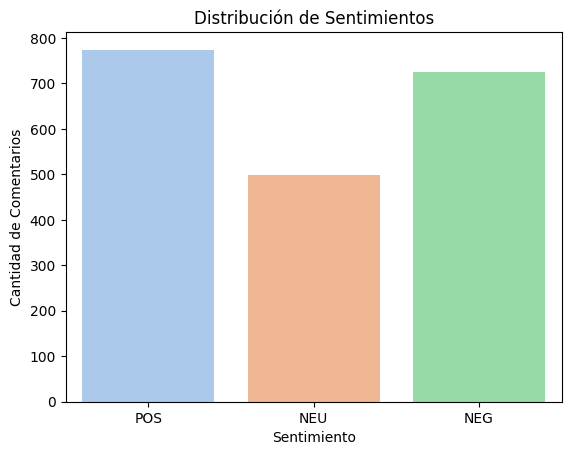

In [21]:
sns.countplot(data=df, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')
plt.title('Distribuci√≥n de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()


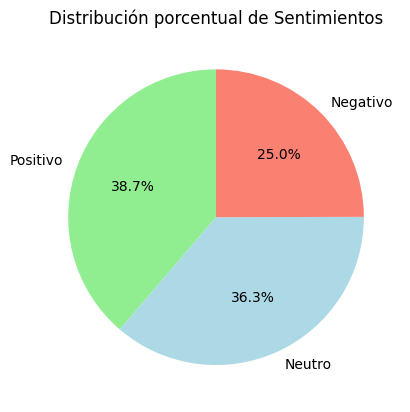

In [22]:
df['Sentimiento'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Positivo', 'Neutro', 'Negativo'],
    colors=['lightgreen', 'lightblue', 'salmon']
)
plt.title('Distribuci√≥n porcentual de Sentimientos')
plt.ylabel('')
plt.show()

### Distribuci√≥n de sentiminetos de los comentarios de Yelp

<ipython-input-23-781cc1cb73e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_yelp, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')


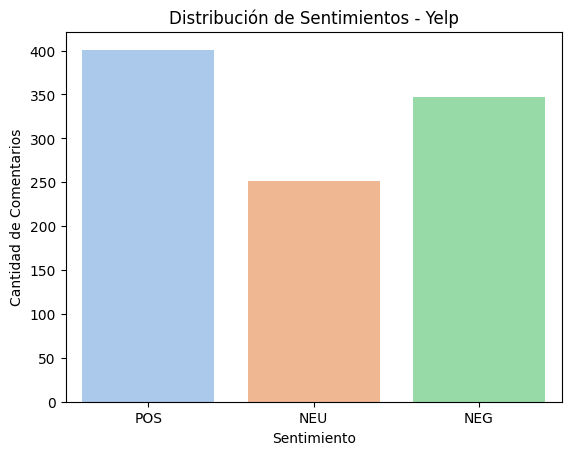

In [23]:
# Filtrar por origen "yelp"
df_yelp = df[df['Origen'] == 'yelp']

# Graficar los sentimientos de Yelp
sns.countplot(data=df_yelp, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')
plt.title('Distribuci√≥n de Sentimientos - Yelp')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()

### Distribuci√≥n de sentiminetos de los comentarios de Amazon

<ipython-input-24-cfdefd8a5715>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_amazon, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')


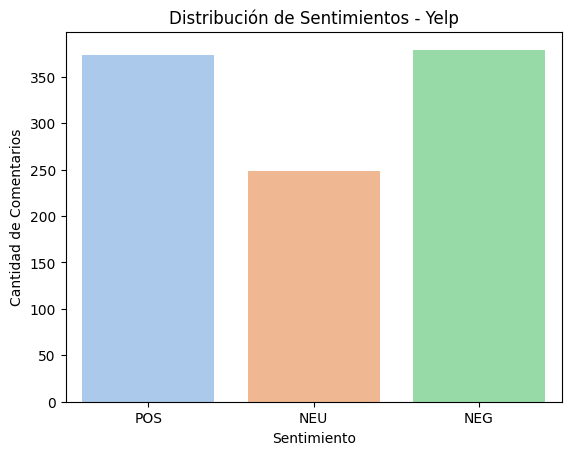

In [24]:
# Filtrar por origen "amazon"
df_amazon = df[df['Origen'] == 'amazon']

# Graficar los sentimientos de Yelp
sns.countplot(data=df_amazon, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')
plt.title('Distribuci√≥n de Sentimientos - Yelp')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()

### Distribuci√≥n de sentimientos pero con los datos lematizados.

In [25]:

resultados = [analyzer.predict(texto) for texto in df['Comentarios_lema'].apply(' '.join)]

# Aplicar a una columna de texto
df['Sentimiento_lema'] = [resultado.output for resultado in resultados]
df['Probabilidad_lema'] = [resultado.probas for resultado in resultados]

<ipython-input-26-883f28cbf286>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_amazon, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')


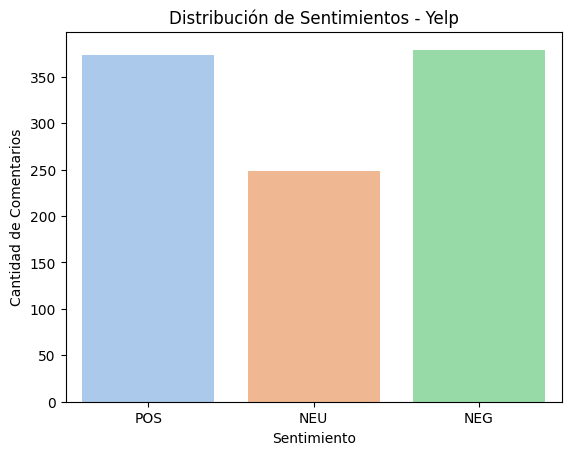

In [26]:
# Filtrar por origen "yelp"
df_amazon = df[df['Origen'] == 'amazon']

# Graficar los sentimientos de Yelp
sns.countplot(data=df_amazon, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')
plt.title('Distribuci√≥n de Sentimientos - Yelp')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()

#### No se observan cambios respecto al an√°lisis realizado con las frases sin lematizar.

### An√°lisis de Confianza para filtrar comentarios con baja certeza

In [27]:
# M√°xima probabilidad (nivel de certeza del modelo)
df['Confianza'] = df['Probabilidad'].apply(lambda x: max(x.values()))  # En este caso, de la lista {'POS': 0.84, 'NEU': 0.10, 'NEG': 0.06} s√≥lo guarda 0.84 que es el valor mayor

In [28]:
# Filtrar comentarios cuya confianza sea menor a 0.6
comentarios_baja_confianza = df[df['Confianza'] < 0.6]

# Ver los primeros resultados
comentarios_baja_confianza[['Comentarios', 'Sentimiento', 'Confianza']]

Comentarios Sentimiento  Confianza
6                     Honestamente no sabia tan fresco         NEU   0.570312
7    Las papas eran como caucho y se notaba que se ...         NEU   0.572579
13   Probe el ravoli de Cape Cod pollo con arandano...         POS   0.523901
16                                    Muy recomendable         POS   0.495531
20                                  Los Burrittos Blah         NEU   0.480604
..                                                 ...         ...        ...
991                               Doloroso en la oreja         NEU   0.468931
992                        Duro un dia y luego exploto         NEG   0.575744
993                                       decepcionado         NEG   0.581094
994                         Tipo de fracasos alrededor         NEU   0.468940
995  La pantalla se mancha facilmente porque toca l...         NEG   0.542472

[377 rows x 3 columns]

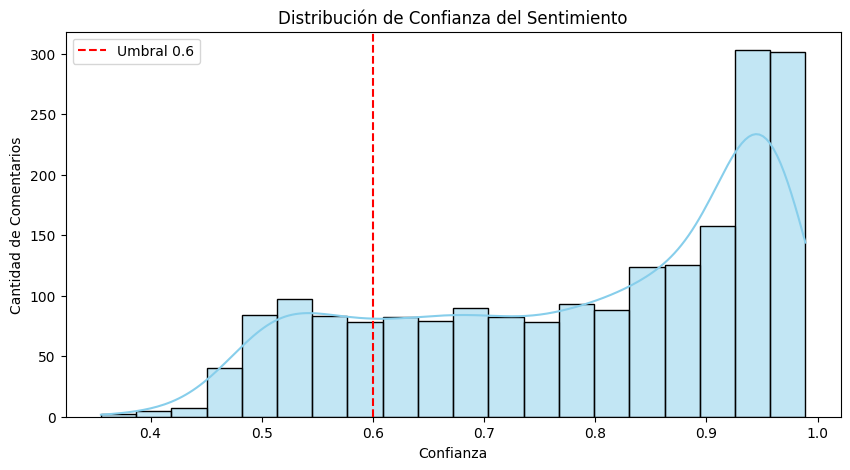

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Confianza', bins=20, kde=True, color='skyblue')
plt.axvline(0.6, color='red', linestyle='--', label='Umbral 0.6')
plt.title('Distribuci√≥n de Confianza del Sentimiento')
plt.xlabel('Confianza')
plt.ylabel('Cantidad de Comentarios')
plt.legend()
plt.show()

<ipython-input-30-2eaacf4e20f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentimiento', y='Confianza', order=['POS', 'NEU', 'NEG'], palette='pastel')


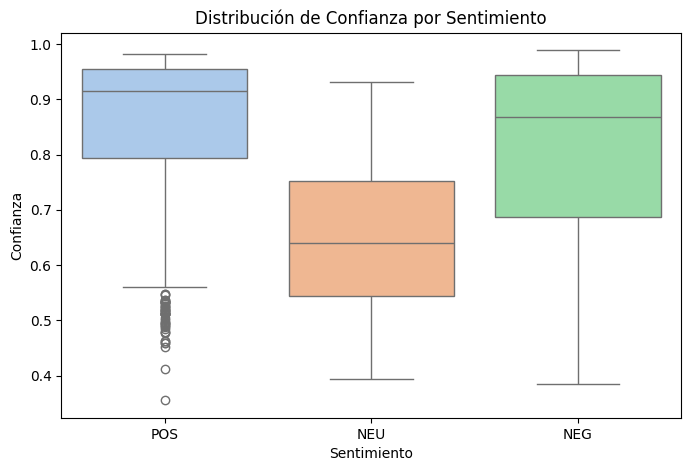

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sentimiento', y='Confianza', order=['POS', 'NEU', 'NEG'], palette='pastel')
plt.title('Distribuci√≥n de Confianza por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Confianza')
plt.show()

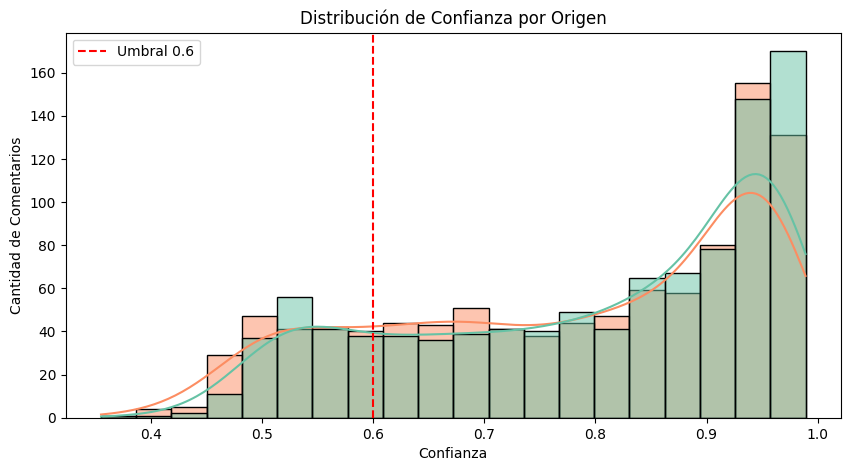

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Confianza', hue='Origen', bins=20, kde=True, palette='Set2')
plt.axvline(0.6, color='red', linestyle='--', label='Umbral 0.6')
plt.title('Distribuci√≥n de Confianza por Origen')
plt.xlabel('Confianza')
plt.ylabel('Cantidad de Comentarios')
plt.legend()
plt.show()

In [32]:
df_baja_confianza = df[df['Confianza'] < 0.6]


In [33]:
 #Unir todos los lemas en un solo string (asumiendo que cada fila de 'Comentarios_lema' es una lista de palabras)
texto_baja_confianza = ' '.join([' '.join(lemas) for lemas in df_baja_confianza['Comentarios_lema']])

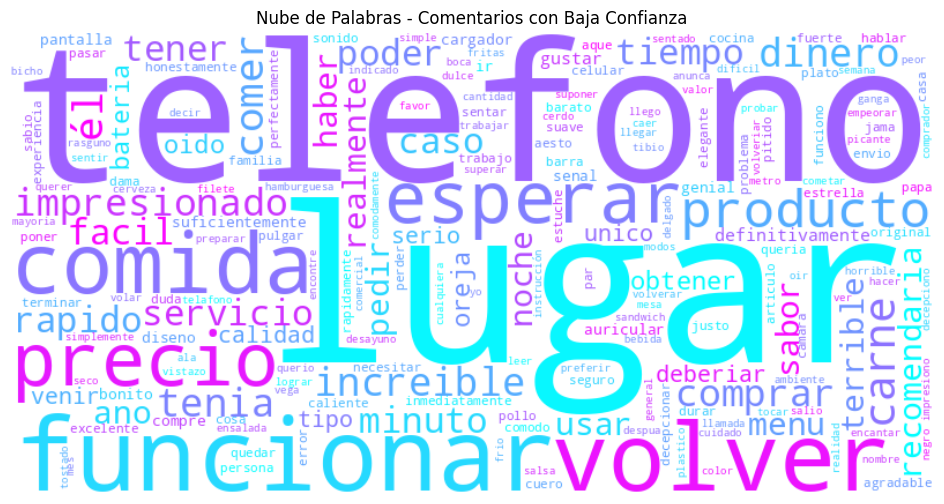

In [34]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cool').generate(texto_baja_confianza)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Comentarios con Baja Confianza")
plt.show()

# TF_IDF

## üåü Explicaci√≥n del TF-IDF

TF-IDF (Term Frequency - Inverse Document Frequency) es una t√©cnica de procesamiento de texto utilizada para evaluar la importancia de una palabra dentro de un conjunto de documentos. Se basa en dos conceptos:

TF (Frecuencia de T√©rmino): Mide cu√°ntas veces aparece un t√©rmino en un documento espec√≠fico, comparado con el n√∫mero total de t√©rminos en ese documento.
Esto ayuda a capturar cu√°n relevante es una palabra dentro de un documento en particular.

IDF (Frecuencia Inversa de Documentos): Mide la importancia de una palabra dentro de un conjunto de documentos. Si una palabra aparece en muchos documentos, tiene menos valor. La f√≥rmula es:

Esto ayuda a reducir el peso de las palabras que aparecen frecuentemente en todos los documentos (como "el", "y", "de"), ya que no agregan mucha informaci√≥n.

As√≠, la importancia de un t√©rmino en un documento depende tanto de su frecuencia en ese documento como de cu√°n com√∫n es en todo el conjunto de documentos.

## 1. TFIDF espera trabajar con strings y  no listas, por lo que se procesde a crear una nueva columna con los datos lematizados en formato str.

In [35]:
df['Comentarios_lema_str'] = df['Comentarios_lema'].apply(lambda x: ' '.join(x))


## 2. C√°lculo de TF-IDF con TfidVetorizer.

In [36]:
# Crear el vectorizador
tfidfvectorizer = TfidfVectorizer(max_features=5000)

# Ajustar y transformar
tfidf_matrix = tfidfvectorizer.fit_transform(df['Comentarios_lema_str'])

# Obtener los t√©rminos
features = tfidfvectorizer.get_feature_names_out()

## 3. Convertir a dataframe para posterior an√°lisis.

In [37]:
# Crear DataFrame TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=features)

# Sumamos por columna para ver los t√©rminos m√°s importantes globalmente
tfidf_scores = df_tfidf.sum().sort_values(ascending=False)

# Mostrar top 10
print(tfidf_scores.head(10).round(3))

telefono     53.929
comida       45.156
servicio     43.023
lugar        42.580
funcionar    40.381
producto     27.100
auricular    25.440
precio       23.988
volver       23.539
calidad      23.413
dtype: float64


## 3. Aplicando TF-IDF y Gr√°ficos

### Gr√°fico de todos los comentarios (Yelp y Amanzon)

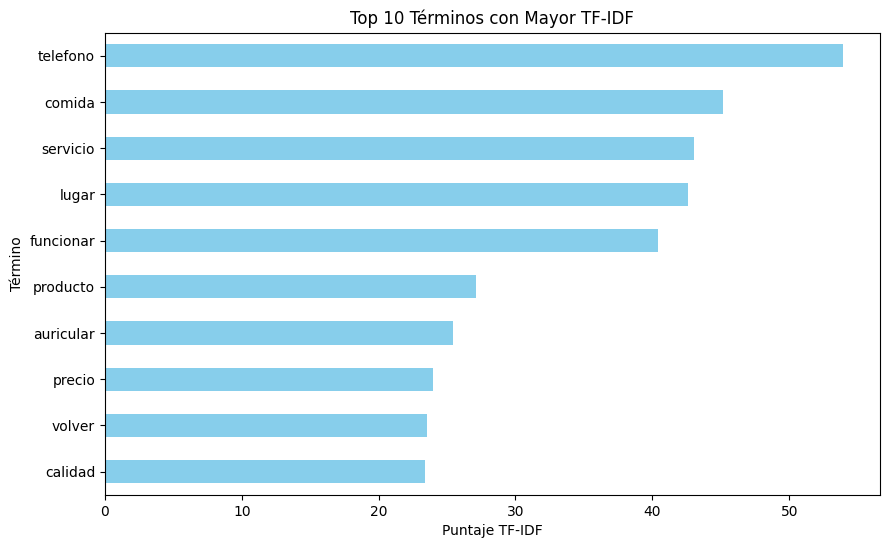

In [38]:

# Tomar los 10 t√©rminos con mayor puntuaci√≥n TF-IDF
top_tfidf = tfidf_scores.head(10)

# Crear gr√°fico de barras
plt.figure(figsize=(10, 6))
top_tfidf.plot(kind='barh', color='skyblue')
plt.title("Top 10 T√©rminos con Mayor TF-IDF")
plt.xlabel("Puntaje TF-IDF")
plt.ylabel("T√©rmino")
plt.gca().invert_yaxis()  # Para que el mayor quede arriba
plt.show()

### Gr√°fico para comentarios de YELP

In [39]:
# Filtrar comentarios de Yelp
df_yelp = df[df['Origen'] == 'yelp']

# Calcular TF-IDF solo para los comentarios de Yelp
tfidf_yelp_matrix = vectorizer.fit_transform(df_yelp['Comentarios_lema_str'])
tfidf_yelp_scores = tfidf_yelp_matrix.sum(axis=0).A1  # Sumar por columna
yelp_features = vectorizer.get_feature_names_out()

# Crear DataFrame con resultados
df_yelp_tfidf = pd.DataFrame(tfidf_yelp_scores, index=yelp_features, columns=['TF-IDF'])
df_yelp_tfidf = df_yelp_tfidf.sort_values(by='TF-IDF', ascending=False)

# Graficar los top 10 t√©rminos de Yelp
plt.figure(figsize=(10, 6))
df_yelp_tfidf.head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 T√©rminos con Mayor TF-IDF - Yelp")
plt.xlabel("Puntaje TF-IDF")
plt.ylabel("T√©rmino")
plt.gca().invert_yaxis()
plt.show()

NameError: name 'vectorizer' is not defined

### Gr√°fico para comentarios de Amazon

In [ ]:
# Filtrar comentarios de Amazon
df_amazon = df[df['Origen'] == 'amazon']

# Calcular TF-IDF solo para los comentarios de Amazon
tfidf_amazon_matrix = vectorizer.fit_transform(df_amazon['Comentarios_lema_str'])
tfidf_amazon_scores = tfidf_amazon_matrix.sum(axis=0).A1  # Sumar por columna
amazon_features = vectorizer.get_feature_names_out()

# Crear DataFrame con resultados
df_amazon_tfidf = pd.DataFrame(tfidf_amazon_scores, index=amazon_features, columns=['TF-IDF'])
df_amazon_tfidf = df_amazon_tfidf.sort_values(by='TF-IDF', ascending=False)

# Graficar los top 10 t√©rminos de Amazon
plt.figure(figsize=(10, 6))
df_amazon_tfidf.head(10).plot(kind='barh', color='yellow')
plt.title("Top 10 T√©rminos con Mayor TF-IDF - amazon")
plt.xlabel("Puntaje TF-IDF")
plt.ylabel("T√©rmino")
plt.gca().invert_yaxis()
plt.show()

# BoW (Bag of Words).

BoW convierte un conjunto de documentos en una matriz de ocurrencias de palabras. A diferencia de TF-IDF, que pondera las palabras seg√∫n su frecuencia e importancia en relaci√≥n con todo el corpus, BoW solo cuenta cu√°ntas veces aparece una palabra en un documento sin considerar la frecuencia global de la palabra.

In [40]:
# Instanciamos el vectorizador BoW
vectorizer_bow = CountVectorizer()

# Aplicamos el vectorizador a los comentarios lematizados
X_bow = vectorizer_bow.fit_transform(df['Comentarios_lema_str'])

# Convertimos la matriz de caracter√≠sticas en un DataFrame para visualizar
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

# Obtener los nombres de las caracter√≠sticas (palabras)
features_bow = vectorizer_bow.get_feature_names_out()

# Crear un DataFrame con las frecuencias de las palabras
df_bow = pd.DataFrame(X_bow.toarray(), columns=features_bow)

# Sumar las frecuencias de palabras por columna
bow_word_frequencies = df_bow.sum().sort_values(ascending=False)

# Mostrar las top 10 palabras m√°s frecuentes
print(bow_word_frequencies.head(10))

telefono     177
comida       138
lugar        136
servicio     112
funcionar     91
auricular     74
√©l            70
calidad       64
excelente     58
producto      56
dtype: int64


<ipython-input-41-9efe526a5f83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.index, y=top_words.values, palette='viridis')


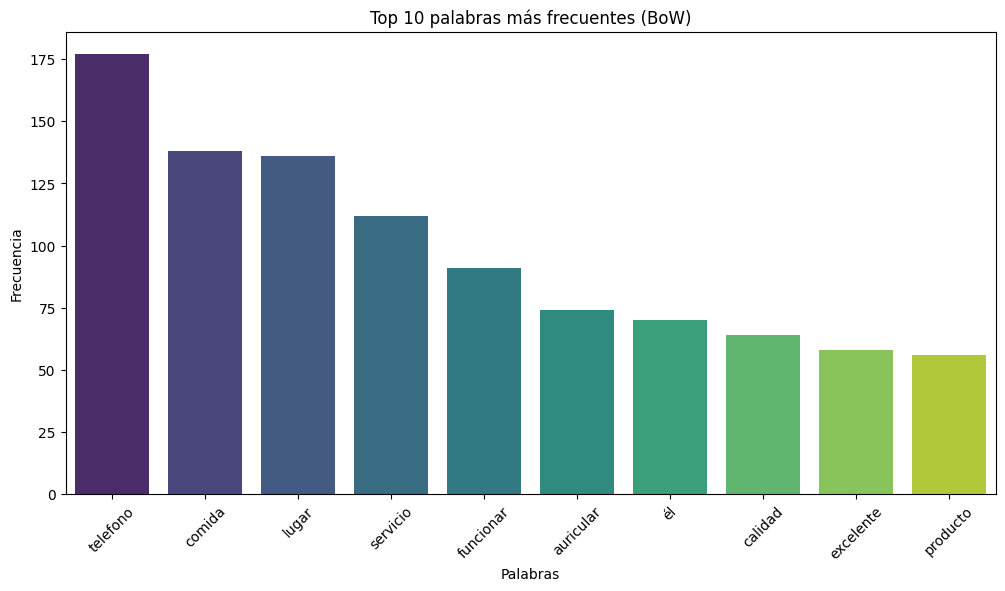

In [41]:
# Gr√°fico de las 10 palabras m√°s frecuentes en BoW
top_words = bow_word_frequencies.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.index, y=top_words.values, palette='viridis')
plt.title('Top 10 palabras m√°s frecuentes (BoW)')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

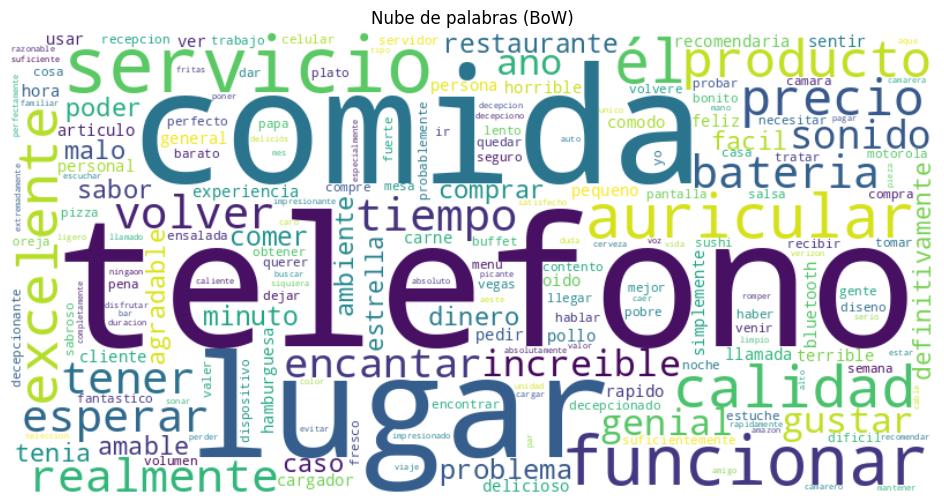

In [42]:
# Crear la nube de palabras con BoW
wordcloud_bow = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bow_word_frequencies)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_bow, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras (BoW)")
plt.show()

# Pruebas de Modelos de Machine Learning

### Separaci√≥n Train-Test

In [43]:
# Defino las caracter√≠sticas (X) y las etiquetas (y)
X = df_tfidf  # Las caracter√≠sticas son los valores del TF-IDF
y = df['Valor']  # La variable objetivo es 'Valor' (0 o 1)

# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresi√≥n Logistica

### Entrenamiento del modelo con TI-FID.

In [44]:
# Crear y entrenar el modelo de regresi√≥n log√≠stica
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Realizar predicci√≥n con Test y evaluar el Accuarcy

In [45]:
# Hacer predicciones
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar precisi√≥n
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Precisi√≥n de la regresi√≥n log√≠stica: {accuracy_logreg:.3f}')

Precisi√≥n de la regresi√≥n log√≠stica: 0.735


### Evaluacion del modelo.

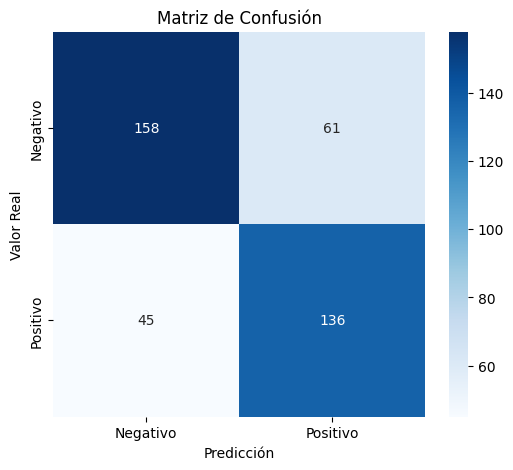

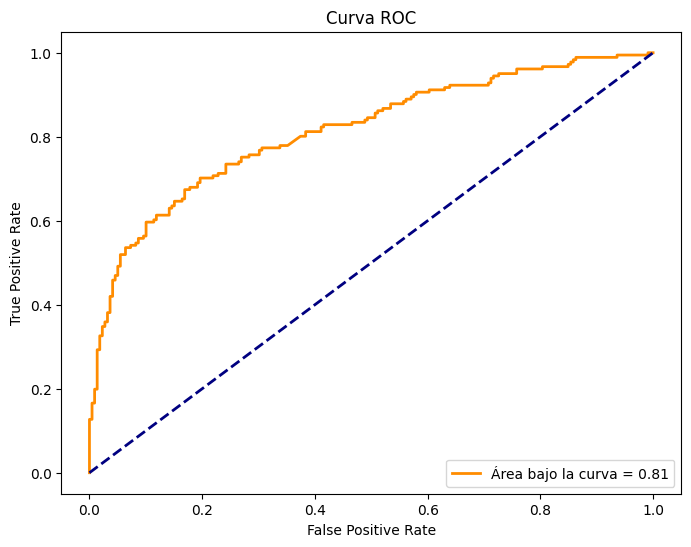

M√©tricas de desempe√±o del modelo:
Accuracy : 0.73
Precision: 0.69
Recall   : 0.75
F1 Score : 0.72


In [46]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_logreg)
labels = ['Negativo', 'Positivo']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥n')
plt.show()

# 2. Curva ROC
fpr, tpr, _ = roc_curve(y_test, logreg_model.decision_function(X_test))
roc_auc = roc_auc_score(y_test, logreg_model.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'√Årea bajo la curva = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# 3. M√©tricas
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print("M√©tricas de desempe√±o del modelo:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


üìä M√©tricas basadas en la matriz:
True Positives (TP) = 136 ‚Üí positivos bien predichos

True Negatives (TN) = 158 ‚Üí negativos bien predichos

False Positives (FP) = 61 ‚Üí negativos clasificados como positivos

False Negatives (FN) = 45 ‚Üí positivos clasificados como negativos

üìä M√©tricas basadas en el desempe√±o:

üîπ Accuracy (0.73): el modelo predice correctamente el 73% de los casos totales.

üîπ Precision (0.69): de todos los comentarios que el modelo predijo como positivos, el 69% realmente lo eran. Podr√≠a estar dando algunos falsos positivos.

üîπ Recall (0.75): de todos los comentarios positivos reales, el modelo logr√≥ detectar el 75%. Esto est√° bastante bien.

üîπ F1 Score (0.72): el equilibrio entre precisi√≥n y recall es bueno.

### Prueba de modelo

In [47]:
nueva_rese√±a = "Estoy disconforme con la atenci√≥n"  # Reemplaza con la rese√±a que deseas probar
nueva_rese√±a_tfidf = tfidfvectorizer.transform([nueva_rese√±a])
prediccion = logreg_model.predict(nueva_rese√±a_tfidf)

# Obtener la probabilidad de la predicci√≥n
probabilidadpositiva = logreg_model.predict_proba(nueva_rese√±a_tfidf)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = probabilidadpositiva[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la cr√≠tica es de caracter {prediccion[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")


Se predice que la cr√≠tica es de caracter 0
 con una probabilidad de que sea positiva de 0.48


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Buscando el mejor modelo

### Validaci√≥n Cruzada del modelo.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Pipeline: vectorizaci√≥n + modelo
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Definir el espacio de b√∫squeda
param_grid = {
    'tfidf__max_df': [0.8, 1.0],
    'tfidf__min_df': [1, 5],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]  # regularizaci√≥n de la regresi√≥n log√≠stica
}

# GridSearch con validaci√≥n cruzada
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Entrenar
grid.fit(df['Comentarios_lema_str'], df['Valor'])

# Mejor modelo
print("Mejores par√°metros encontrados:")
print(grid.best_params_)
print(f"Mejor F1 score: {grid.best_score_:.3f}")

modelo_best = grid.best_params_



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores par√°metros encontrados:
{'clf__C': 10, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Mejor F1 score: 0.742


Precisi√≥n media (F1 = 0.742): el modelo logra un buen equilibrio entre precisi√≥n y recall.

Desviaci√≥n est√°ndar baja (¬±0.026): hay poca variaci√≥n entre los diferentes subconjuntos de datos usados durante la validaci√≥n cruzada, lo que sugiere que el modelo generaliza bien.

In [49]:
from sklearn.model_selection import cross_val_score
# Validaci√≥n cruzada con 5 particiones (k-fold = 5)
scores = cross_val_score(pipeline, df['Comentarios_lema_str'], df['Valor'], cv=5, scoring='accuracy')

# Resultados
print(f"Precisi√≥n media con validaci√≥n cruzada: {scores.mean():.3f}")
print(f"Desviaci√≥n est√°ndar: {scores.std():.3f}")


Precisi√≥n media con validaci√≥n cruzada: 0.740
Desviaci√≥n est√°ndar: 0.026


## Prueba del modelo Regresion Log√≠stica usando BoW

Reporte de Clasificaci√≥n:

              precision    recall  f1-score   support

           0      0.791     0.708     0.747       219
           1      0.686     0.773     0.727       181

    accuracy                          0.738       400
   macro avg      0.739     0.741     0.737       400
weighted avg      0.744     0.738     0.738       400



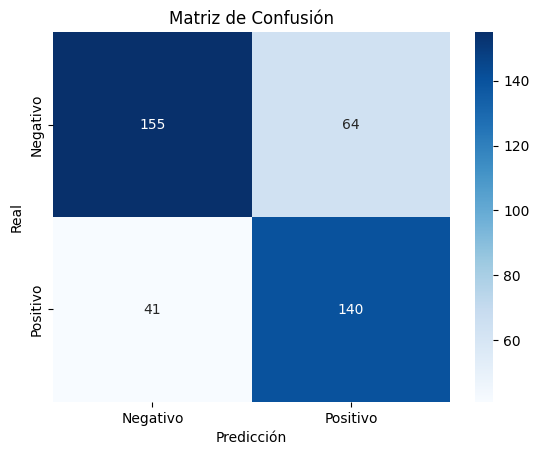

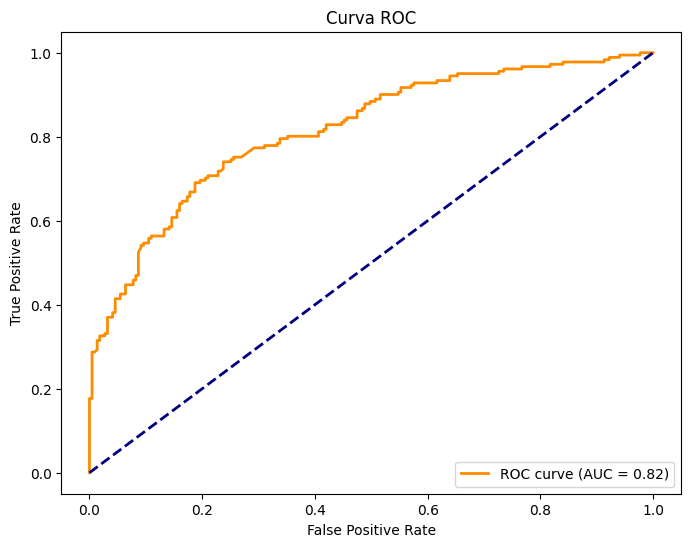

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
# Dividir los datos en entrenamiento y prueba
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Entrenar modelo
model_bow = LogisticRegression(solver='liblinear')
model_bow.fit(X_train_bow, y_train_bow)

# Predecir
y_pred_bow = model_bow.predict(X_test_bow)
y_prob_bow = model_bow.decision_function(X_test_bow)

# M√©tricas
print("Reporte de Clasificaci√≥n:\n")
print(classification_report(y_test_bow, y_pred_bow, digits=3))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test_bow, y_pred_bow)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusi√≥n")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_bow, y_prob_bow)
roc_auc = roc_auc_score(y_test_bow, y_prob_bow)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()